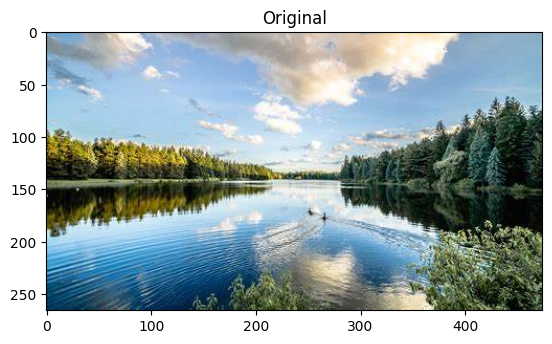

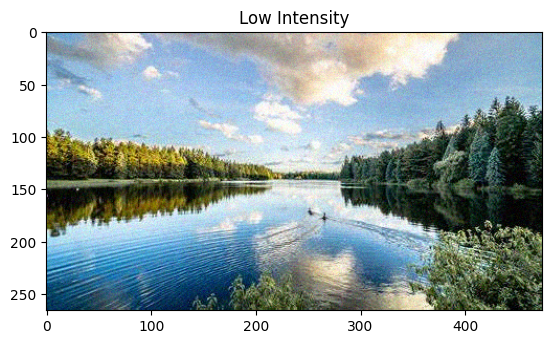

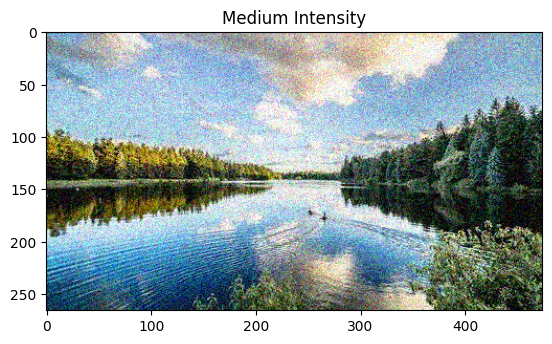

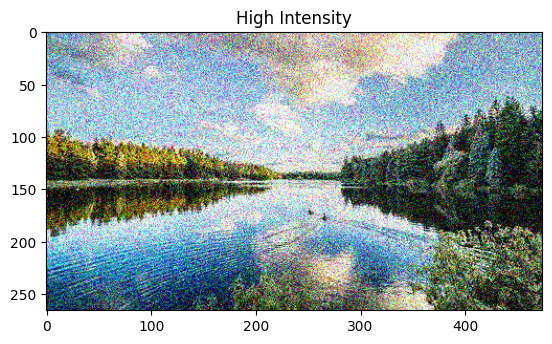

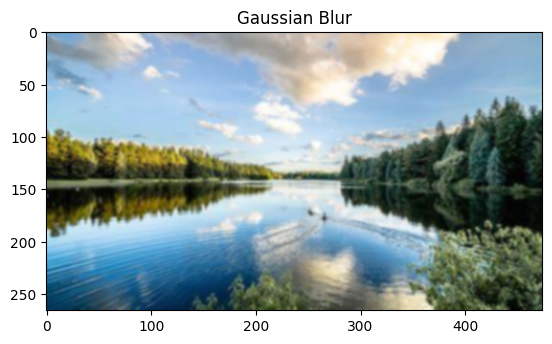

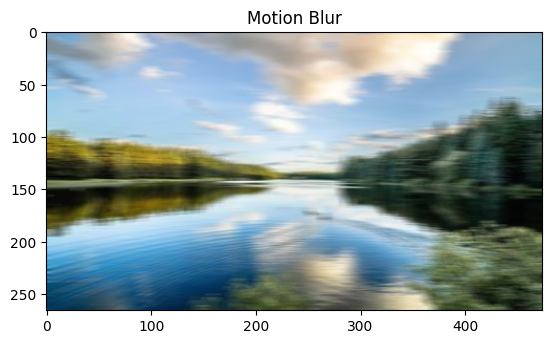

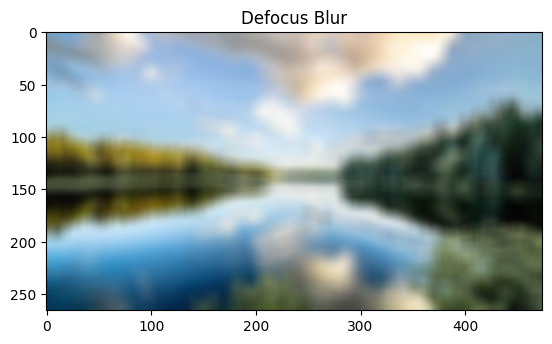

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/Users/daver/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/daver/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /Users/daver/Library/Python/3.9/lib/python/site-packages/lpips/weights/v0.1/alex.pth
PSNR (Low Intensity): 30.405099970443743
PSNR (Medium Intensity): 28.352900827136803
PSNR (High Intensity): 28.04382257447729
SSIM (Low Intensity): 0.7507744781647414
SSIM (Medium Intensity): 0.4012615638796295
SSIM (High Intensity): 0.25112348378571087
LPIPS (Low Intensity): tensor([[[[0.1007]]]], grad_fn=<AddBackward0>)
LPIPS (Medium Intensity): tensor([[[[0.4458]]]], grad_fn=<AddBackward0>)
LPIPS (High Intensity): tensor([[[[0.7208]]]], grad_fn=<AddBackward0>)


In [9]:
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
from lpips import LPIPS
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

def add_gaussian_noise(image, mean, std_dev):
    noise = np.random.normal(mean, std_dev, image.shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

def blur_image(image, blur_type, kernel_size):
    if blur_type == 'gaussian':
        blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    elif blur_type == 'motion':
        kernel = np.zeros((kernel_size, kernel_size))
        kernel[int((kernel_size-1)/2), :] = np.ones(kernel_size)
        kernel = kernel / kernel_size
        blurred_image = cv2.filter2D(image, -1, kernel)
    elif blur_type == 'defocus':
        blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 10)
    else:
        raise ValueError('Invalid blur')
    return blurred_image

def calculate_psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    psnr = 20 * np.log10(255 / np.sqrt(mse))
    return psnr

original_image = cv2.imread('test.jpg')

noisy_image_low = add_gaussian_noise(original_image, 0, 10)
noisy_image_medium = add_gaussian_noise(original_image, 0, 30)
noisy_image_high = add_gaussian_noise(original_image, 0, 50)

plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.show()

plt.imshow(cv2.cvtColor(noisy_image_low, cv2.COLOR_BGR2RGB))
plt.title('Low Intensity')
plt.show()

plt.imshow(cv2.cvtColor(noisy_image_medium, cv2.COLOR_BGR2RGB))
plt.title('Medium Intensity')
plt.show()

plt.imshow(cv2.cvtColor(noisy_image_high, cv2.COLOR_BGR2RGB))
plt.title('High Intensity')
plt.show()

blurred_image_gaussian = blur_image(original_image, 'gaussian', 5)
blurred_image_motion = blur_image(original_image, 'motion', 15)
blurred_image_defocus = blur_image(original_image, 'defocus', 15)

plt.imshow(cv2.cvtColor(blurred_image_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Gaussian Blur')
plt.show()

plt.imshow(cv2.cvtColor(blurred_image_motion, cv2.COLOR_BGR2RGB))
plt.title('Motion Blur')
plt.show()

plt.imshow(cv2.cvtColor(blurred_image_defocus, cv2.COLOR_BGR2RGB))
plt.title('Defocus Blur')
plt.show()

psnr_low = calculate_psnr(original_image, noisy_image_low)
psnr_medium = calculate_psnr(original_image, noisy_image_medium)
psnr_high = calculate_psnr(original_image, noisy_image_high)

ssim_low = ssim(original_image, noisy_image_low, multichannel=True, channel_axis=2)
ssim_medium = ssim(original_image, noisy_image_medium, multichannel=True, channel_axis=2)
ssim_high = ssim(original_image, noisy_image_high, multichannel=True, channel_axis=2)

transform = transforms.ToTensor()
original_tensor = transform(original_image)
noisy_tensor_low = transform(noisy_image_low)
noisy_tensor_medium = transform(noisy_image_medium)
noisy_tensor_high = transform(noisy_image_high)

lpips = LPIPS(net='alex')

lpips_low = lpips(original_tensor, noisy_tensor_low)
lpips_medium = lpips(original_tensor, noisy_tensor_medium)
lpips_high = lpips(original_tensor, noisy_tensor_high)

print('PSNR (Low Intensity):', psnr_low)
print('PSNR (Medium Intensity):', psnr_medium)
print('PSNR (High Intensity):', psnr_high)

print('SSIM (Low Intensity):', ssim_low)
print('SSIM (Medium Intensity):', ssim_medium)
print('SSIM (High Intensity):', ssim_high)

print('LPIPS (Low Intensity):', lpips_low)
print('LPIPS (Medium Intensity):', lpips_medium)
print('LPIPS (High Intensity):', lpips_high)
